#**FIT5196 Task 2 in Assessment 2**

Student Name: Anushka Jemima

Student ID: 33617457

Student Name: Shruthi Shashidhara Shastry

Student ID: 33684669

Date: 18-10-2024

###**Overview of task 2:**

The primary goal of this task is to reshape the given dataset and prepare it for linear regression modeling by exploring different transformations (like normalization, scaling, log transformation, Box-Cox transformation, etc.) for the following features:

- number_of_houses
- number_of_units
- population
- aus_born_perc
- median_income
- median_house_price (target variable)




**Import the necessary libraries**:

The code below imports essential libraris for data analysis and visualization:

- pandas for data manipulation,
- numpy for numerical operations,
- matplotlib.pyplot and seaborn for plotting, and
- scipy.stats.boxcox for statistical transformations.


In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read the excel file**

In [3]:
# Read the Excel file into a DataFrame
suburb_info = pd.read_excel('/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/suburb_info.xlsx')

# Display the DataFrame
print(suburb_info)

               suburb  number_of_houses  number_of_units   municipality  \
0          ABBOTSFORD              2304             4706          Yarra   
1          ABERFELDIE              1410              453  Moonee Valley   
2           ALBANVALE              1897              138       Brimbank   
3              ALBION              1389             1392       Brimbank   
4          ALPHINGTON              1729             1099        Darebin   
..                ...               ...              ...            ...   
197  WILLIAMS LANDING              2735              173        Wyndham   
198           WINDSOR              2201             4448    Stonnington   
199           WOLLERT              6516              259     Whittlesea   
200         YALLAMBIE              1286               81        Banyule   
201        YARRAVILLE              5855             2072    Maribyrnong   

    aus_born_perc median_income median_house_price  population  
0             68%        $1,797   

#### **Exploratory data analysis:**

Before applying any transformation, we first performed EDA to understand the structure, pattern and distribution of each feature and check for skewness and outliers. This helps in determining whether any transformation is needed.

Lets first understand the dataset:


In [4]:
selected_columns = ['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income', 'median_house_price']
suburb_info = suburb_info[selected_columns]

# Display the selected data
suburb_info.head()

,number_of_houses,number_of_units,population,aus_born_perc,median_income,median_house_price
0,2304,4706,4025,68%,"$1,797","$1,299,400"
1,1410,453,22442,81%,"$1,571","$1,926,600"
2,1897,138,54005,46%,$907,"$594,200"
3,1389,1392,30677,52%,$929,"$739,100"
4,1729,1099,9227,73%,"$1,538","$1,729,600"


The above block selects six relevant columns from the dataset and displays the first five rows. It shows the raw data in these columns, revealing information like house prices, population, and median income for each suburb before any transformation or cleaning is applied.

In [5]:
print(suburb_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   number_of_houses    202 non-null    int64 
 1   number_of_units     202 non-null    int64 
 2   population          202 non-null    int64 
 3   aus_born_perc       202 non-null    object
 4   median_income       202 non-null    object
 5   median_house_price  202 non-null    object
dtypes: int64(3), object(3)
memory usage: 9.6+ KB
None


We can see summary of the dataset using the info() function. It shows that the dataset contains 202 entries across 6 columns. Three columns are of integer type (int64), while three others are stored as objects (string format). All columns have non-null values.

In [6]:
suburb_info.describe()

,number_of_houses,number_of_units,population
count,202.000000,202.000000,202.000000
mean,4155.767327,2480.410891,18659.311881
std,3400.864988,3132.684712,9604.187282
min,283.000000,60.000000,170.000000
25%,1973.500000,620.500000,12063.000000
50%,3256.500000,1603.000000,17583.000000
75%,5518.500000,3089.000000,24045.000000
max,23338.000000,24380.000000,54005.000000


From the above block we get to know the descriptive statistics for the columns number_of_houses, number_of_units, and population.

It shows that :
- average suburb has around 4,155 houses, 2,480 units, and a population of 18,659.
- There is significant variability, as indicated by the high standard deviations, especially for population (std = 9,604).
-  The values range widely, with some suburbs having as few as 170 residents and others up to 54,005

**Removal of unwanted symbol**

Lets remove the unwanted symbols like % and  $ as shown below:

In [7]:
# Remove dollar signs and commas, then convert to numeric
suburb_info['median_income'] = suburb_info['median_income'].apply(lambda x: float(x.replace('$', '').replace(',', '')))
suburb_info['median_house_price'] = suburb_info['median_house_price'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

# Remove the percentage sign and divide by 100
suburb_info['aus_born_perc'] = suburb_info['aus_born_perc'].apply(lambda x: float(x.replace('%', '')) / 100)

# Display the cleaned data
print(suburb_info.head())


   number_of_houses  number_of_units  population  aus_born_perc  \
0              2304             4706        4025           0.68   
1              1410              453       22442           0.81   
2              1897              138       54005           0.46   
3              1389             1392       30677           0.52   
4              1729             1099        9227           0.73   

   median_income  median_house_price  
0         1797.0           1299400.0  
1         1571.0           1926600.0  
2          907.0            594200.0  
3          929.0            739100.0  
4         1538.0           1729600.0  


The above block of code  removes unwanted symbols from the median_income, median_house_price (removing $ and commas), and aus_born_perc (removing % and converting to a proportion).

After cleaning, the data is displayed, showing that the values are now properly formatted as numeric, allowing for analysis without text-based symbols.

In [8]:
suburb_info.describe()

,number_of_houses,number_of_units,population,aus_born_perc,median_income,median_house_price
count,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02
mean,4155.767327,2480.410891,18659.311881,0.683663,1387.935644,1.218817e+06
std,3400.864988,3132.684712,9604.187282,0.107613,317.841321,4.716807e+05
min,283.000000,60.000000,170.000000,0.360000,633.000000,5.072000e+05
25%,1973.500000,620.500000,12063.000000,0.620000,1182.250000,8.706750e+05
50%,3256.500000,1603.000000,17583.000000,0.700000,1393.000000,1.134500e+06
75%,5518.500000,3089.000000,24045.000000,0.770000,1560.000000,1.467550e+06
max,23338.000000,24380.000000,54005.000000,0.880000,2352.000000,2.875800e+06


the above code provides summary statistics after removing unwanted symbols from the median_income, median_house_price, and aus_born_perc columns. The cleaned data now shows correct numeric values for these columns, and we can observe key statistics like mean, standard deviation, and percentiles.
For example, the average median house price is approximately 1.22 million, with a wide range from $507,200 - $2.87 million.

**Correlation matrix**:

Lets check how each variables/features are correlated to target variable( median_house_price) through correlation matrix.

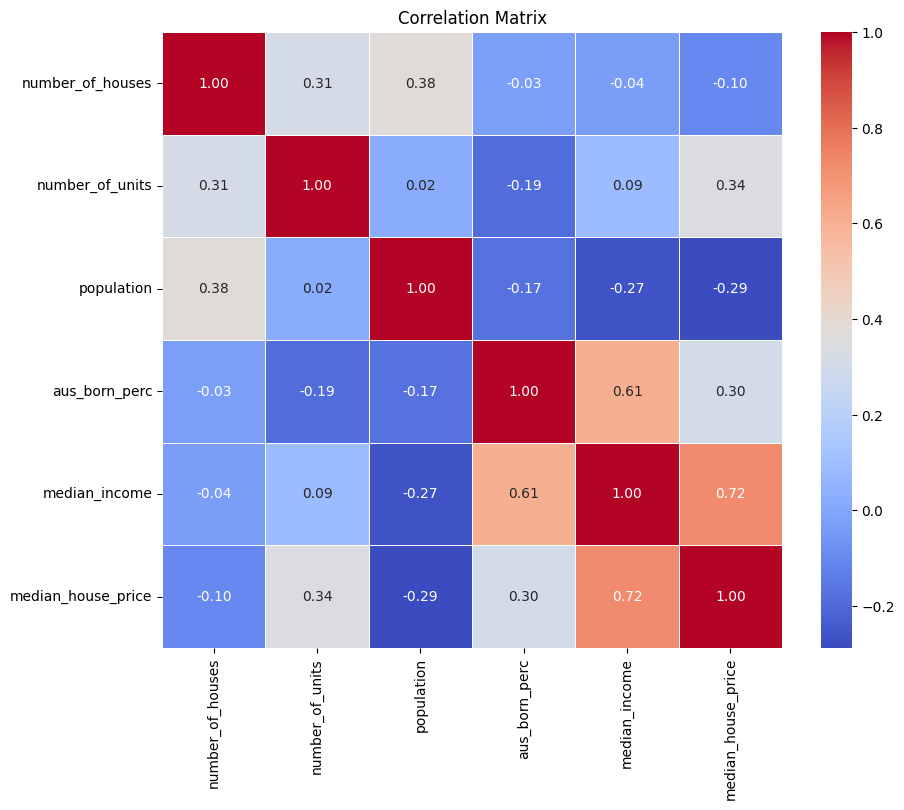

In [9]:
# Calculate the correlation matrix
correlation_matrix = suburb_info[['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income', 'median_house_price']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

This correlation matrix visually shows the relationships between various features and the target variable, median_house_price. Darker colors indicate stronger correlations.

- median_income has the strongest positive correlation with median_house_price (0.72), suggesting that higher incomes are associated with higher house prices.
- Other features, like number_of_units (0.34) and aus_born_perc (0.30), show weaker correlations.
- number_of_houses and population have low or even negative correlations with median_house_price, indicating less impact on house prices.

We can summarise that median_income is the most significant predictor of house prices compared to other variables.


**Scatter plot**:

The below scatter plots show the relationships between various features and median_house_price.


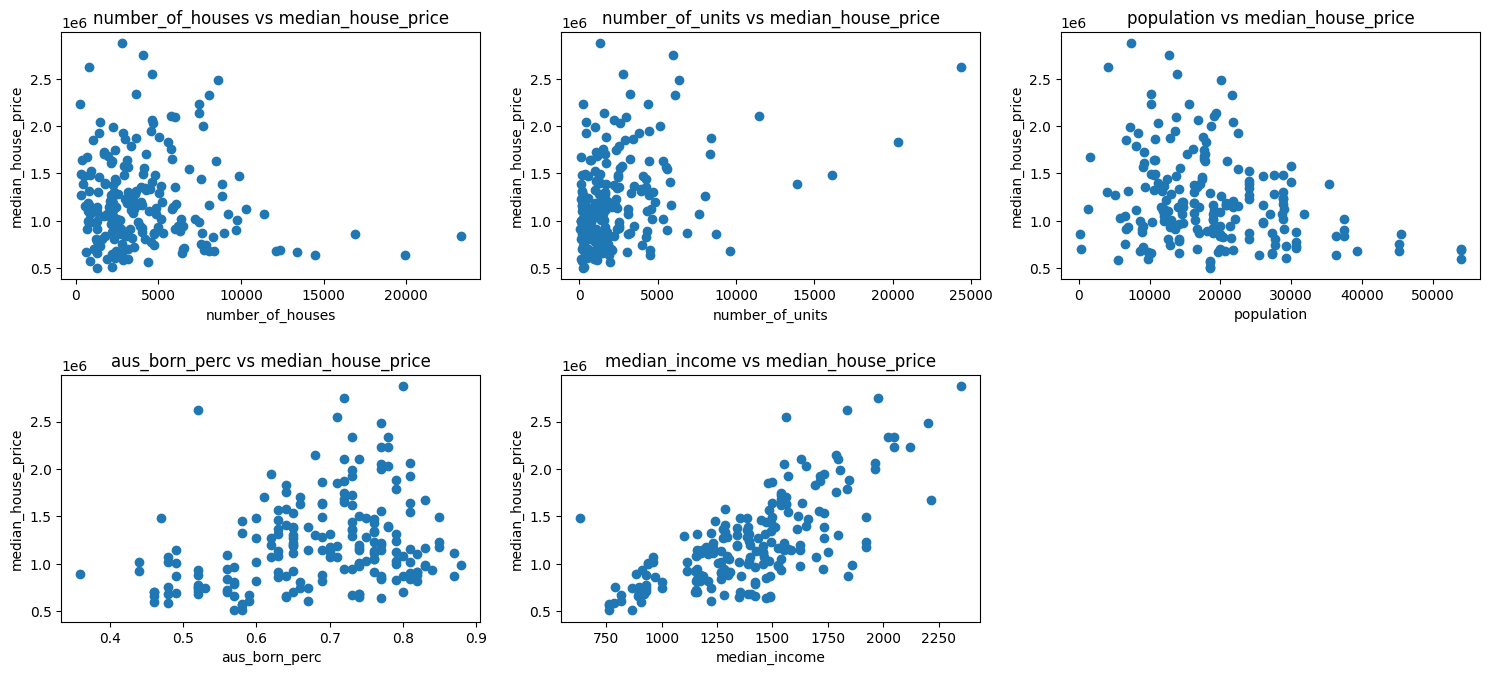

In [10]:
# Scatter plots against median_house_price
plt.figure(figsize=(15, 10))
numeric_columns = suburb_info.select_dtypes(include=[np.number]).columns
for i, column in enumerate(numeric_columns[numeric_columns != 'median_house_price'], 1):
    plt.subplot(3, 3, i)
    plt.scatter(suburb_info[column], suburb_info['median_house_price'])
    plt.xlabel(column)
    plt.ylabel('median_house_price')
    plt.title(f'{column} vs median_house_price')
plt.tight_layout()
plt.show()

Interpretation:

- number_of_houses and population show weak or unclear correlations with house price, as the points are widely scattered.
- number_of_units has a slightly positive but weak correlation, with higher unit numbers generally corresponding to higher house prices.
- aus_born_perc shows a moderate relationship with median house prices, with higher percentages of Australian-born residents somewhat linked to higher prices.
- median_income has the strongest positive correlation and shows linear properties as seen in the scatter plot, as higher median incomes clearly result in higher house prices, with a more defined upward trend in the scatter plot.

**Histogram Distribution**:

Lets check the distribution of each features as seen below:



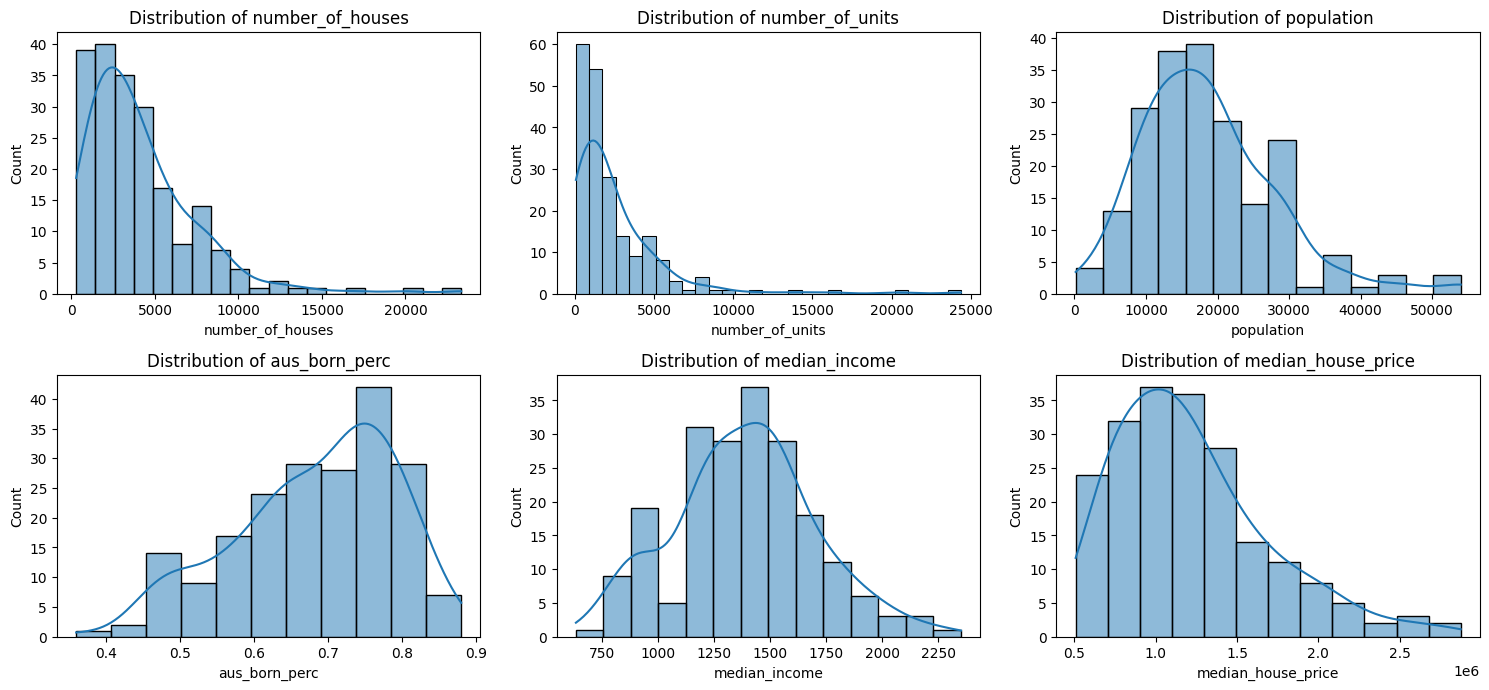

In [11]:
#histogram distribution
features = ['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income']

plt.figure(figsize=(15, 10))
for i, column in enumerate(features + ['median_house_price'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(suburb_info[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

These histograms show the distributions of six variables:

- number_of_houses and number_of_units are heavily right-skewed, indicating that most suburbs have fewer houses and units, with a few having much larger numbers.
- population follows a more normal distribution comparatively, peaking around 20,000, with fewer suburbs having very low or very high populations.
- aus_born_perc is slightly left-skewed, with most suburbs having between 60% and 80% Australian-born residents.
- median_income follows a roughly normal distribution, centered around $1,400.
- median_house_price is right-skewed, showing that the majority of suburbs have house prices around 1 million with fewer suburbs having significantly higher prices.

### **TRANSFORMATION**:

Transformation is the process of modifying data to make it suitable for analysis, often by stabilizing variance or making data more normally distributed.

Based on the EDA, certain variables in this dataset, like median_income,number_of_houses,number_of_units,aus_born_perc and population show skewness. Transformation is crucial to improve the linearity of relationships and optimize model performance.

Lets check each features:

**Median income column:**


We applied log transformation and Box-Cox transformation to median_income because the original data exhibited positive skewness. Log transformation helps reduce skewness, particularly for right-skewed distributions, while Box-Cox transformation stabilizes variance and normalizes the data.



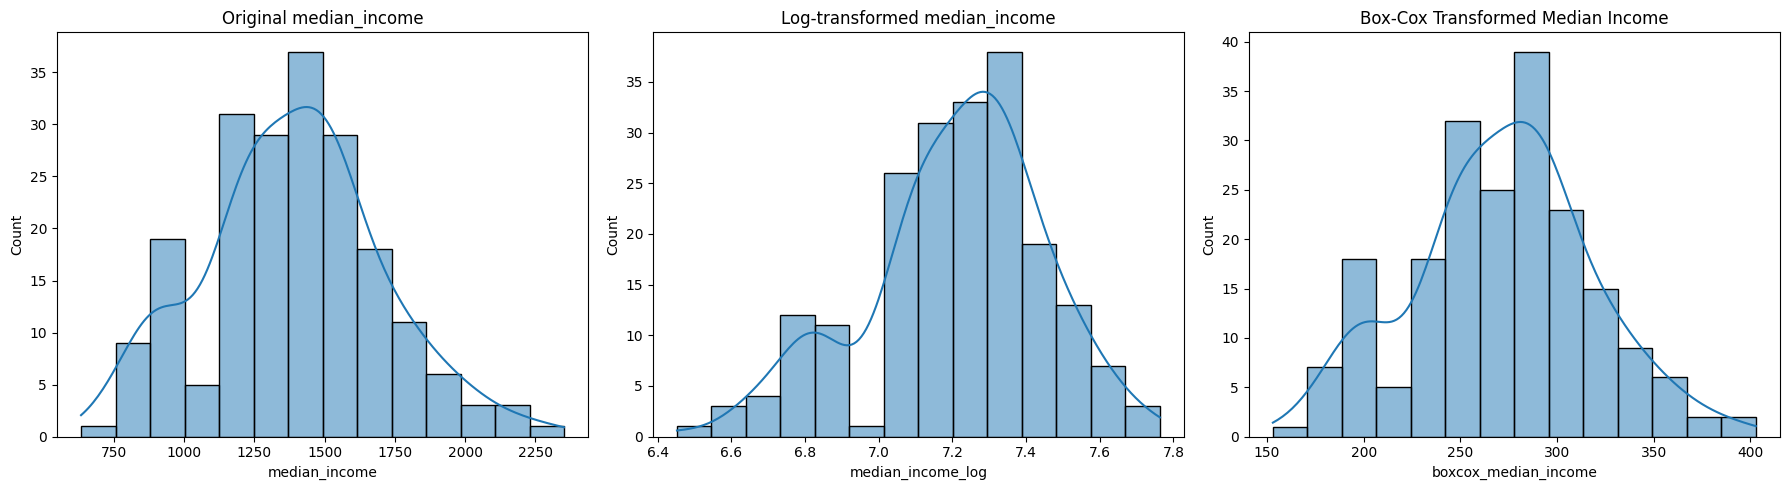

Skewness of original median_income: 0.17251808529196955
Skewness of log-transformed median_income: -0.5011132620301298
Skewness of box cox-transformed median_income: -0.008409307396352992
Correlation of original median_income with median_house_price: 0.7193841731950906
Correlation of log-transformed median_income with median_house_price: 0.6828469750492988
Correlation of box cox-transformed median_income with median_house_price: 0.7115576464850802


In [12]:
from scipy import stats

# log Transformation
suburb_info[f'median_income_log'] = np.log1p(suburb_info['median_income'])

# Box-Cox Transformation
suburb_info['boxcox_median_income'], _ = stats.boxcox(suburb_info['median_income'])

# Create a figure
plt.figure(figsize=(18, 5))

# Original median income distribution
plt.subplot(1, 3, 1)
sns.histplot(suburb_info['median_income'], kde=True)
plt.title('Original median_income')

# Log-transformed median income distribution
plt.subplot(1, 3, 2)
sns.histplot(suburb_info['median_income_log'], kde=True)
plt.title('Log-transformed median_income')

# Box-Cox Transformed median income distribution
plt.subplot(1, 3, 3)
sns.histplot(suburb_info['boxcox_median_income'], kde=True)
plt.title('Box-Cox Transformed Median Income')

# Display the plots
plt.tight_layout()
plt.show()

skewness_values_log = suburb_info['median_income_log'].skew()
skewness_values = suburb_info['median_income'].skew()
skewness_values_box = suburb_info['boxcox_median_income'].skew()

corr_original = suburb_info['median_income'].corr(suburb_info['median_house_price'])
corr_log = suburb_info['median_income_log'].corr(suburb_info['median_house_price'])
corr_box = suburb_info['boxcox_median_income'].corr(suburb_info['median_house_price'])

# Display the skewness and correlation values
print("Skewness of original median_income:", skewness_values)
print("Skewness of log-transformed median_income:", skewness_values_log)
print("Skewness of box cox-transformed median_income:", skewness_values_box)

print("Correlation of original median_income with median_house_price:", corr_original)
print("Correlation of log-transformed median_income with median_house_price:", corr_log)
print("Correlation of box cox-transformed median_income with median_house_price:", corr_box)

**Interpretation of Graphs and Results:**

- Original median_income:
The original data is slightly skewed (skewness = 0.17), with a peak around $1,500.
- Log-transformed median_income:
After log transformation, the skewness is reduced to -0.50, making the distribution more symmetric, but still slightly left-skewed.
- Box-Cox Transformed Median Income:
The Box-Cox transformation reduces skewness further, nearly eliminating it (-0.008), producing a nearly normal distribution.

**Skewness and Correlation:**
- Skewness: The Box-Cox transformation produced the least skewed data (skewness ≈ 0), improving the data's symmetry and making it ideal for linear models.
- Correlation: The correlation between median_income and median_house_price improved slightly with the transformations, with Box-Cox showing a correlation of 0.71, which is similar to the original 0.72 and log-transformed 0.68.

As we can see from the above graphs and results, there is no need for transformation for median_income, so we will keep the original column as it is.


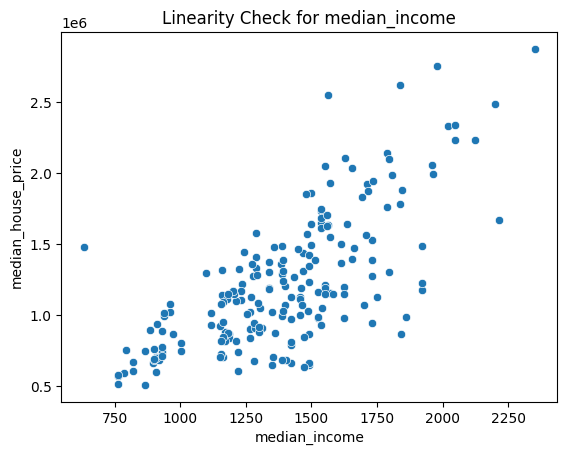

In [13]:
# Linearity check
sns.scatterplot(x=suburb_info['median_income'], y=suburb_info['median_house_price'])
plt.title('Linearity Check for median_income')
plt.show()

This scatter plot shows a positive linear relationship between median_income and median_house_price. As the median income increases, house prices tend to increase as well, indicating a strong correlation and linearity property.


**Number of houses column:**

We applied various transformations to the number_of_houses column due to its significant right skewness, which can negatively impact model performance.

- Log transformation: Reduces skewness by compressing large values more than smaller ones.
- Square root and cube root: Moderates skewness while preserving the structure of the data, making distributions closer to normal.
- Box-Cox transformation: A flexible method that handles skewness and stabilizes variance while normalizing data.

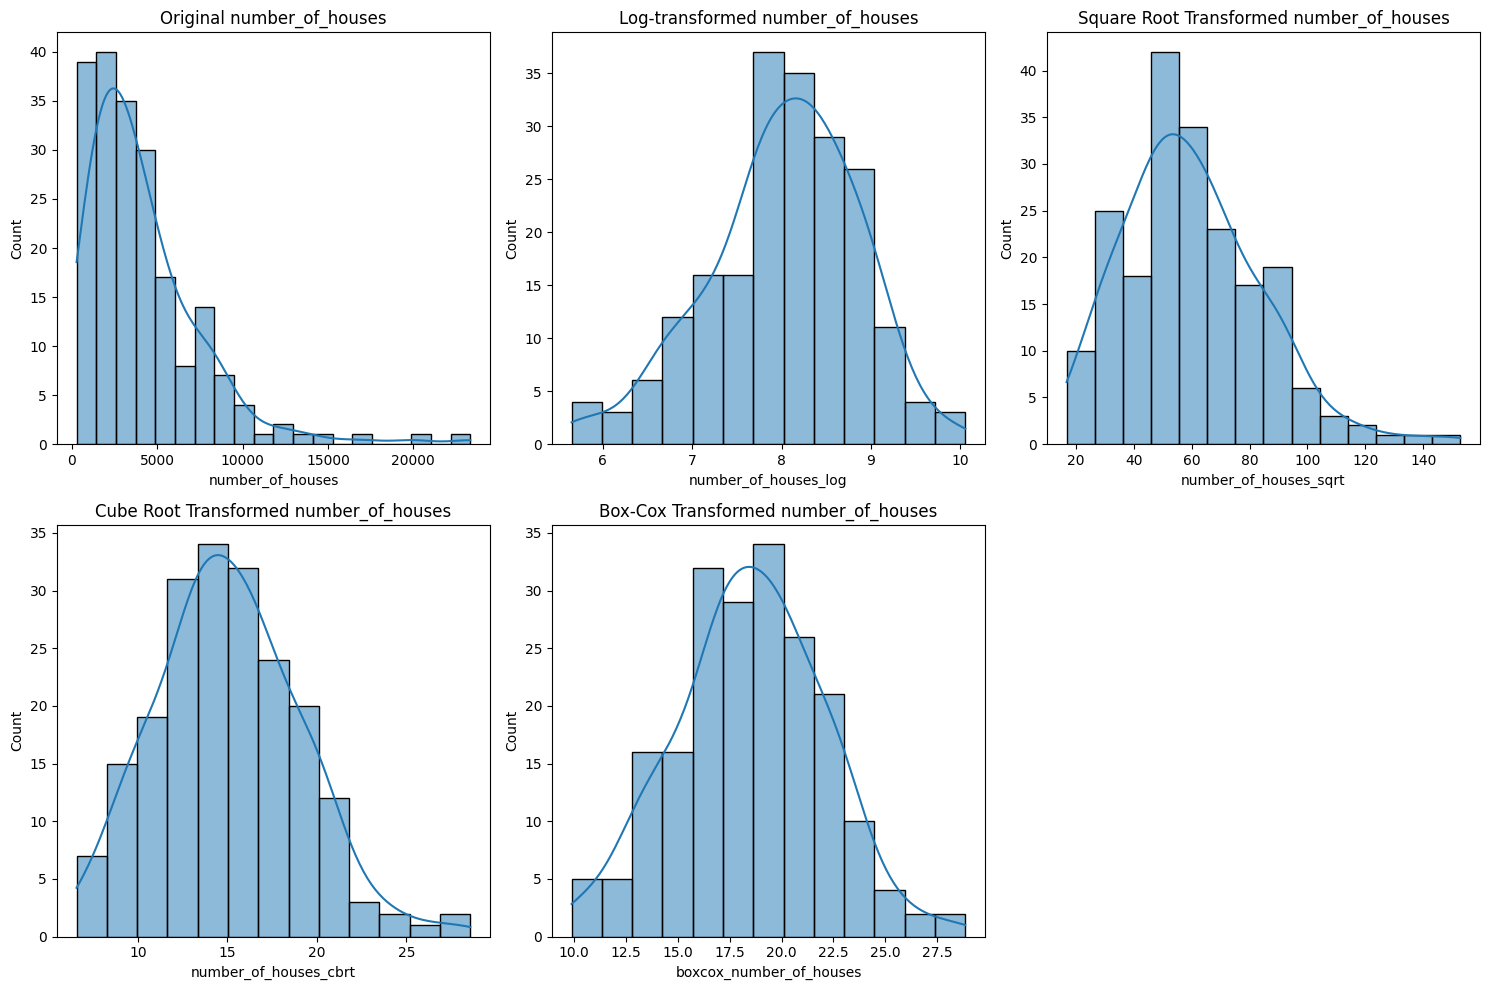

Skewness of original number_of_houses: 2.156185383189318
Skewness of log-transformed number_of_houses: -0.4411391738006059
Skewness of square root-transformed number_of_houses: 0.7624640070620796
Skewness of cube root-transformed number_of_houses: 0.35296213313697966
Skewness of box-cox-transformed number_of_houses: -0.006417064176488034

Correlation of original number_of_houses with median_house_price: -0.10449002542504032
Correlation of log-transformed number_of_houses with median_house_price: -0.058901522865885694
Correlation of square root-transformed number_of_houses with median_house_price: -0.07578414897967332
Correlation of cube root-transformed number_of_houses with median_house_price: -0.06809583113238127
Correlation of box-cox-transformed number_of_houses with median_house_price: -0.06277241166604727


In [14]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Log transformation
suburb_info['number_of_houses_log'] = np.log1p(suburb_info['number_of_houses'])

# Square root transformation
suburb_info['number_of_houses_sqrt'] = np.sqrt(suburb_info['number_of_houses'])

# Cube root transformation
suburb_info['number_of_houses_cbrt'] = np.cbrt(suburb_info['number_of_houses'])

# Box-Cox Transformation
suburb_info['boxcox_number_of_houses'], _ = stats.boxcox(suburb_info['number_of_houses'] + 1)

# Plot the original, log, square root, cube root, and Box-Cox transformed data
plt.figure(figsize=(15, 10))

# Original
plt.subplot(2, 3, 1)
sns.histplot(suburb_info['number_of_houses'], kde=True)
plt.title('Original number_of_houses')

# Log-transformed
plt.subplot(2, 3, 2)
sns.histplot(suburb_info['number_of_houses_log'], kde=True)
plt.title('Log-transformed number_of_houses')

# Square root-transformed
plt.subplot(2, 3, 3)
sns.histplot(suburb_info['number_of_houses_sqrt'], kde=True)
plt.title('Square Root Transformed number_of_houses')

# Cube root-transformed
plt.subplot(2, 3, 4)
sns.histplot(suburb_info['number_of_houses_cbrt'], kde=True)
plt.title('Cube Root Transformed number_of_houses')

# Box-Cox transformed
plt.subplot(2, 3, 5)
sns.histplot(suburb_info['boxcox_number_of_houses'], kde=True)
plt.title('Box-Cox Transformed number_of_houses')

plt.tight_layout()
plt.show()

# Calculate skewness for each transformation
skewness_original = suburb_info['number_of_houses'].skew()
skewness_log = suburb_info['number_of_houses_log'].skew()
skewness_sqrt = suburb_info['number_of_houses_sqrt'].skew()
skewness_cbrt = suburb_info['number_of_houses_cbrt'].skew()
skewness_boxcox = suburb_info['boxcox_number_of_houses'].skew()


corr_original = suburb_info['number_of_houses'].corr(suburb_info['median_house_price'])
corr_log = suburb_info['number_of_houses_log'].corr(suburb_info['median_house_price'])
corr_sqrt = suburb_info['number_of_houses_sqrt'].corr(suburb_info['median_house_price'])
corr_cbrt = suburb_info['number_of_houses_cbrt'].corr(suburb_info['median_house_price'])
corr_boxcox = suburb_info['boxcox_number_of_houses'].corr(suburb_info['median_house_price'])

# Display the skewness and correlation values
print("Skewness of original number_of_houses:", skewness_original)
print("Skewness of log-transformed number_of_houses:", skewness_log)
print("Skewness of square root-transformed number_of_houses:", skewness_sqrt)
print("Skewness of cube root-transformed number_of_houses:", skewness_cbrt)
print("Skewness of box-cox-transformed number_of_houses:", skewness_boxcox)

print("\nCorrelation of original number_of_houses with median_house_price:", corr_original)
print("Correlation of log-transformed number_of_houses with median_house_price:", corr_log)
print("Correlation of square root-transformed number_of_houses with median_house_price:", corr_sqrt)
print("Correlation of cube root-transformed number_of_houses with median_house_price:", corr_cbrt)
print("Correlation of box-cox-transformed number_of_houses with median_house_price:", corr_boxcox)


**interpretatio:**

- Original number_of_houses:
Highly skewed distribution (skewness = 2.16) with many suburbs having a small number of houses, while a few have very large values.

- Log-transformed:
Significantly reduced skewness (-0.44), bringing the distribution closer to normal, but still slightly left-skewed.

- Square root-transformed:
Skewness improved to 0.76, but the distribution is still not symmetric.

- Cube root-transformed:
Skewness reduced further to 0.35, making the distribution more balanced.

- Box-Cox transformed:
Achieved near-zero skewness (-0.006), resulting in the most normal-like distribution among the transformations.

**kewness and Correlation:**

- Skewness: Box-Cox achieved the lowest skewness, nearly eliminating the asymmetry in the distribution.

- Correlation: Despite the transformations, the correlation between number_of_houses and median_house_price did not improve significantly (correlation ranges from -0.10 to -0.06).

Despite the skewness, the original column shows an adequate correlation with the target variable. Given that transformations did not improve the correlation significantly, we will keep the original number_of_houses column as it is.


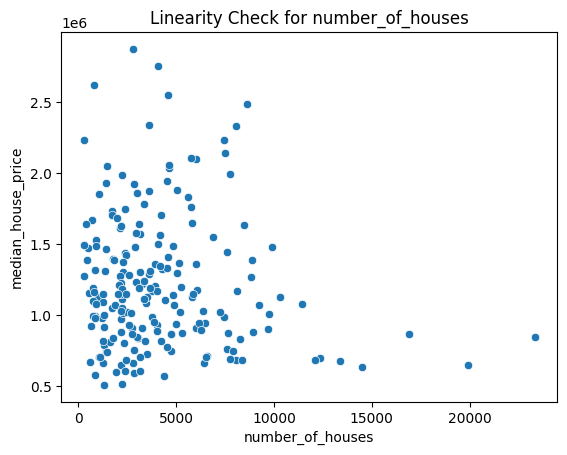

In [15]:
sns.scatterplot(x=suburb_info['number_of_houses'], y=suburb_info['median_house_price'])
plt.title('Linearity Check for number_of_houses')
plt.show()


The scatter plot shows that while number_of_houses is skewed, the correlation with median_house_price is weak, as indicated by the wide spread of points with no clear trend.

**Number of units column:**

Same as number of houses the number_of_units column is highly right-skewed, which prompted the application of various transformations:

- Log transformation: Used to reduce skewness by compressing large values.
- Square root and cube root transformations: Moderate the effect of outliers while balancing the distribution.
- Box-Cox transformation: A powerful method that stabilizes variance and normalizes the distribution.

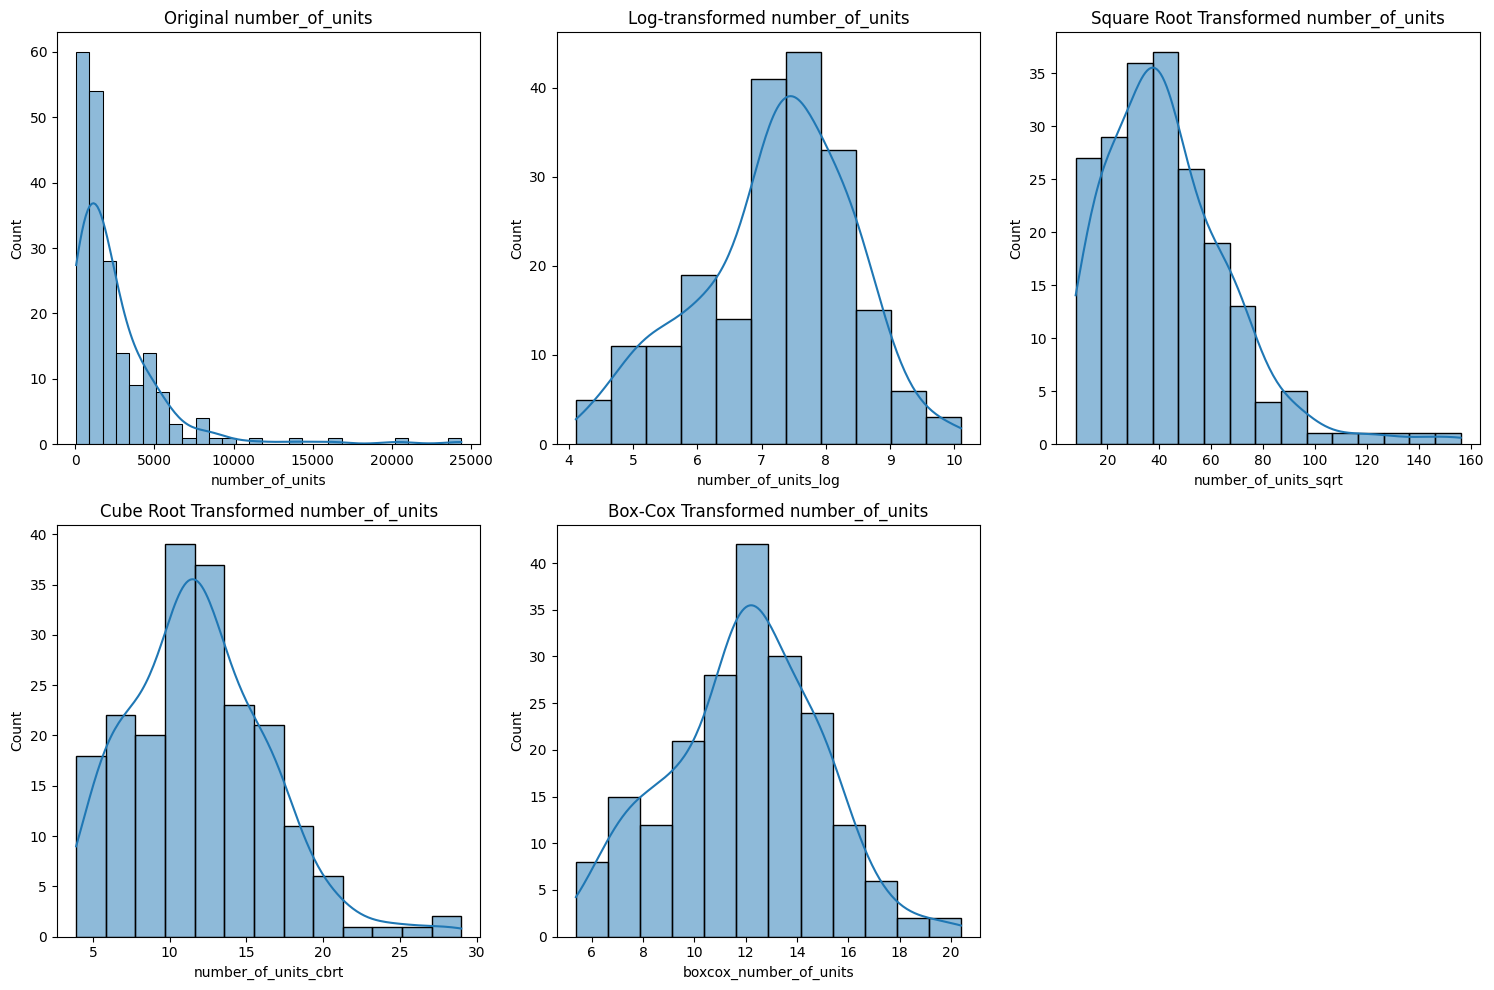

Skewness of original number_of_units: 3.63016534727861
Skewness of log-transformed number_of_units: -0.39529358890911764
Skewness of square root-transformed number_of_units: 1.3239114504050489
Skewness of cube root-transformed number_of_units: 0.6825115783110808
Skewness of box-cox-transformed number_of_units: -0.014065587505543558

Correlation of original number_of_units with median_house_price: 0.34385768323409466
Correlation of log-transformed number_of_units with median_house_price: 0.3158833810643571
Correlation of square root-transformed number_of_units with median_house_price: 0.35521601290283256
Correlation of cube root-transformed number_of_units with median_house_price: 0.3481479807203019
Correlation of box-cox-transformed number_of_units with median_house_price: 0.3306988349239424


In [16]:
# Log transformation
suburb_info['number_of_units_log'] = np.log1p(suburb_info['number_of_units'])

# Square root transformation
suburb_info['number_of_units_sqrt'] = np.sqrt(suburb_info['number_of_units'])

# Cube root transformation
suburb_info['number_of_units_cbrt'] = np.cbrt(suburb_info['number_of_units'])

# Box-Cox Transformation
suburb_info['boxcox_number_of_units'], _ = stats.boxcox(suburb_info['number_of_units'] + 1)

# Plot the original, log, square root, cube root, and Box-Cox transformed data for number_of_units
plt.figure(figsize=(15, 10))

# Original
plt.subplot(2, 3, 1)
sns.histplot(suburb_info['number_of_units'], kde=True)
plt.title('Original number_of_units')

# Log-transformed
plt.subplot(2, 3, 2)
sns.histplot(suburb_info['number_of_units_log'], kde=True)
plt.title('Log-transformed number_of_units')

# Square root-transformed
plt.subplot(2, 3, 3)
sns.histplot(suburb_info['number_of_units_sqrt'], kde=True)
plt.title('Square Root Transformed number_of_units')

# Cube root-transformed
plt.subplot(2, 3, 4)
sns.histplot(suburb_info['number_of_units_cbrt'], kde=True)
plt.title('Cube Root Transformed number_of_units')

# Box-Cox transformed
plt.subplot(2, 3, 5)
sns.histplot(suburb_info['boxcox_number_of_units'], kde=True)
plt.title('Box-Cox Transformed number_of_units')

plt.tight_layout()
plt.show()

# Calculate skewness for each transformation for number_of_units
skewness_original_units = suburb_info['number_of_units'].skew()
skewness_log_units = suburb_info['number_of_units_log'].skew()
skewness_sqrt_units = suburb_info['number_of_units_sqrt'].skew()
skewness_cbrt_units = suburb_info['number_of_units_cbrt'].skew()
skewness_boxcox_units = suburb_info['boxcox_number_of_units'].skew()

corr_original_units = suburb_info['number_of_units'].corr(suburb_info['median_house_price'])
corr_log_units = suburb_info['number_of_units_log'].corr(suburb_info['median_house_price'])
corr_sqrt_units = suburb_info['number_of_units_sqrt'].corr(suburb_info['median_house_price'])
corr_cbrt_units = suburb_info['number_of_units_cbrt'].corr(suburb_info['median_house_price'])
corr_boxcox_units = suburb_info['boxcox_number_of_units'].corr(suburb_info['median_house_price'])

# Display the skewness and correlation values for number_of_units
print("Skewness of original number_of_units:", skewness_original_units)
print("Skewness of log-transformed number_of_units:", skewness_log_units)
print("Skewness of square root-transformed number_of_units:", skewness_sqrt_units)
print("Skewness of cube root-transformed number_of_units:", skewness_cbrt_units)
print("Skewness of box-cox-transformed number_of_units:", skewness_boxcox_units)

print("\nCorrelation of original number_of_units with median_house_price:", corr_original_units)
print("Correlation of log-transformed number_of_units with median_house_price:", corr_log_units)
print("Correlation of square root-transformed number_of_units with median_house_price:", corr_sqrt_units)
print("Correlation of cube root-transformed number_of_units with median_house_price:", corr_cbrt_units)
print("Correlation of box-cox-transformed number_of_units with median_house_price:", corr_boxcox_units)


Interpretation of above results and graphs:

- Original number_of_units:Highly skewed distribution with most suburbs having few units, while a few have very large numbers (skewness = 3.63).

- Log-transformed:Skewness reduced to -0.39, improving the symmetry of the distribution.

- Square root-transformed:Skewness improved to 1.22, showing moderate improvement while maintaining some skewness.

- Cube root-transformed:Reduced skewness to 0.82, offering better symmetry compared to square root.

- Box-Cox transformed:Achieved near-zero skewness (-0.014), resulting in the most normal-like distribution.


- Skewness: Box-Cox achieved the lowest skewness (≈0), but the square root transformation also reduced skewness significantly.

- Correlation: The square root transformation provided the best correlation with median_house_price (correlation = 0.355), slightly outperforming other transformations.

As the square root transformation offers the best balance between reducing skewness and improving correlation with the target variable, we will retain the square root-transformed number_of_units column for further analysis.

**Population column:**

The population column showed slight skewness. To address this, we applied several transformations to bring the data closer to a normal distribution:

- Log transformation: Reduces skewness by compressing large values.
- Square root and cube root transformations: Reduce the effect of extreme values while keeping the data structure.
- Box-Cox transformation: Handles skewness and stabilizes variance


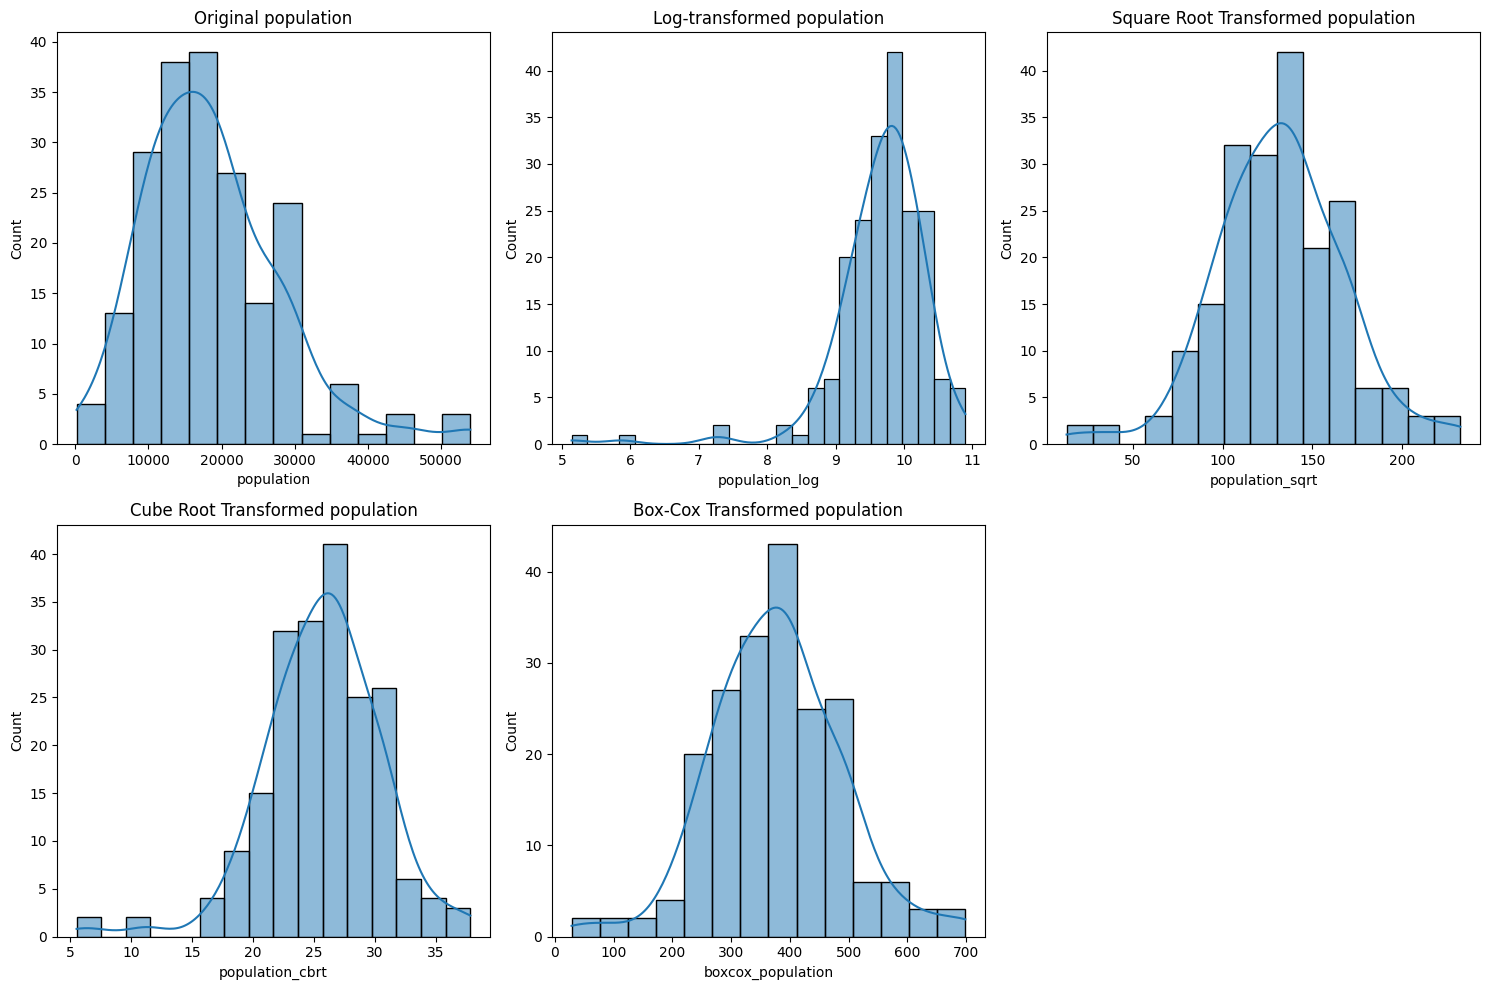

Skewness of original population: 1.0858654270152182
Skewness of log-transformed population: -2.6412277450354456
Skewness of square root-transformed population: -0.02877628750315642
Skewness of cube root-transformed population: -0.6018110091205457
Skewness of box-cox-transformed population: 0.10044424721195518

Correlation of original population with median_house_price: -0.2872423018397893
Correlation of log-transformed population with median_house_price: -0.15663770507566024
Correlation of square root-transformed population with median_house_price: -0.25047778956428784
Correlation of cube root-transformed population with median_house_price: -0.2277969781573643
Correlation of box-cox-transformed population with median_house_price: -0.2555341445263009


In [17]:
# Log transformation for population
suburb_info['population_log'] = np.log1p(suburb_info['population'])

# Square root transformation for population
suburb_info['population_sqrt'] = np.sqrt(suburb_info['population'])

# Cube root transformation for population
suburb_info['population_cbrt'] = np.cbrt(suburb_info['population'])

# Box-Cox Transformation for population
suburb_info['boxcox_population'], _ = stats.boxcox(suburb_info['population'] + 1)

# Plot the original, log, square root, cube root, and Box-Cox transformed data for population
plt.figure(figsize=(15, 10))

# Original
plt.subplot(2, 3, 1)
sns.histplot(suburb_info['population'], kde=True)
plt.title('Original population')

# Log-transformed
plt.subplot(2, 3, 2)
sns.histplot(suburb_info['population_log'], kde=True)
plt.title('Log-transformed population')

# Square root-transformed
plt.subplot(2, 3, 3)
sns.histplot(suburb_info['population_sqrt'], kde=True)
plt.title('Square Root Transformed population')

# Cube root-transformed
plt.subplot(2, 3, 4)
sns.histplot(suburb_info['population_cbrt'], kde=True)
plt.title('Cube Root Transformed population')

# Box-Cox transformed
plt.subplot(2, 3, 5)
sns.histplot(suburb_info['boxcox_population'], kde=True)
plt.title('Box-Cox Transformed population')

plt.tight_layout()
plt.show()

# Calculate skewness for each transformation for population
skewness_original_population = suburb_info['population'].skew()
skewness_log_population = suburb_info['population_log'].skew()
skewness_sqrt_population = suburb_info['population_sqrt'].skew()
skewness_cbrt_population = suburb_info['population_cbrt'].skew()
skewness_boxcox_population = suburb_info['boxcox_population'].skew()

corr_original_population = suburb_info['population'].corr(suburb_info['median_house_price'])
corr_log_population = suburb_info['population_log'].corr(suburb_info['median_house_price'])
corr_sqrt_population = suburb_info['population_sqrt'].corr(suburb_info['median_house_price'])
corr_cbrt_population = suburb_info['population_cbrt'].corr(suburb_info['median_house_price'])
corr_boxcox_population = suburb_info['boxcox_population'].corr(suburb_info['median_house_price'])

# Display the skewness and correlation values for population
print("Skewness of original population:", skewness_original_population)
print("Skewness of log-transformed population:", skewness_log_population)
print("Skewness of square root-transformed population:", skewness_sqrt_population)
print("Skewness of cube root-transformed population:", skewness_cbrt_population)
print("Skewness of box-cox-transformed population:", skewness_boxcox_population)

print("\nCorrelation of original population with median_house_price:", corr_original_population)
print("Correlation of log-transformed population with median_house_price:", corr_log_population)
print("Correlation of square root-transformed population with median_house_price:", corr_sqrt_population)
print("Correlation of cube root-transformed population with median_house_price:", corr_cbrt_population)
print("Correlation of box-cox-transformed population with median_house_price:", corr_boxcox_population)


Interpretation:
- original population:
The distribution is slightly skewed (skewness = 1.08) with most suburbs having populations between 10,000 and 30,000.
- Log-transformed:
The skewness is reduced significantly to -2.64, but the data became slightly left-skewed.
- Square root-transformed:
Skewness nearly eliminated (-0.03), producing a more symmetric distribution.
- Cube root-transformed:
Further reduced skewness to -0.60, bringing the data close to normal.
- Box-Cox transformed:
Almost perfectly normal distribution with skewness close to 0.1, resulting in the best symmetry.

skewness and correlation:
- Skewness: Box-Cox achieved near-zero skewness, but the square root transformation also effectively reduced skewness.

- Correlation: Despite the transformations, the original population column shows the best correlation with the target variable (correlation = -0.28).

Given that the transformations did not significantly improve the correlation and the original column already showed a reasonable distribution, we will keep the original population column for further analysis.


**aus_born_per column:**

The aus_born_perc column represents proportions, and such data often benefit from specialized transformations. We chose:

- Logit transformation: Converts proportions to log-odds, making them easier to model by reducing the effect of extreme values close to 0 or 1.
- Arcsine transformation: Commonly used for percentage data, helping stabilize variance in proportion-based datasets.

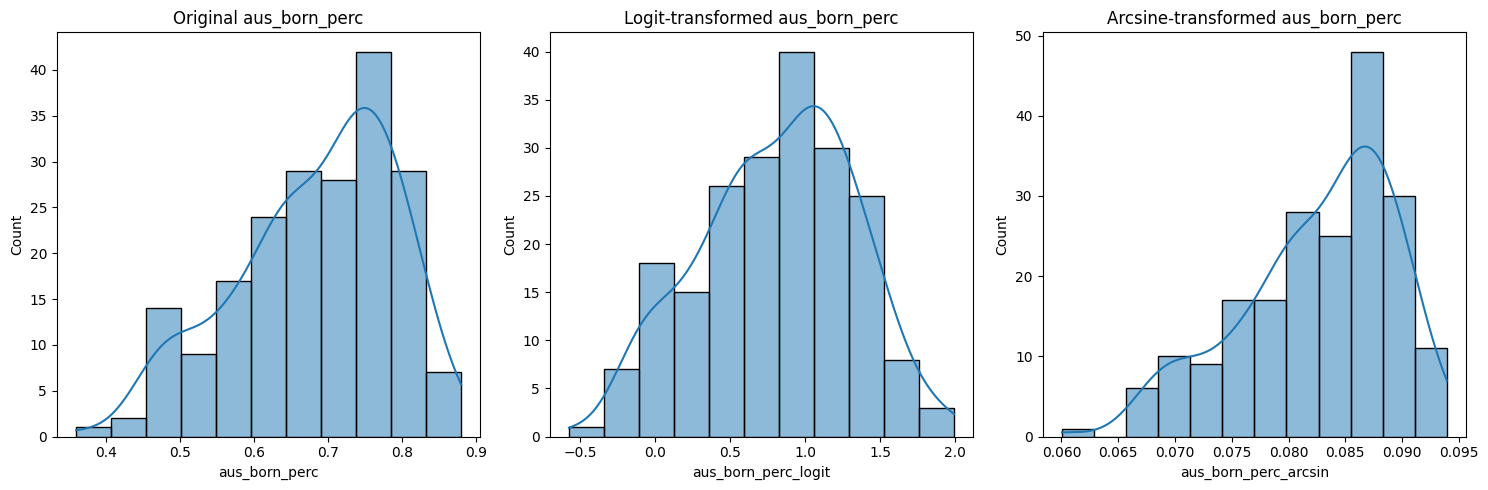

Skewness of original aus_born_perc: -0.5678957791840579
Skewness of logit-transformed aus_born_perc: -0.23192007993609196
Skewness of arcsine-transformed aus_born_perc: -0.7371212842524302

Correlation of original aus_born_perc with median_house_price: 0.3038599267287983
Correlation of logit-transformed aus_born_perc with median_house_price: 0.27997942498432343
Correlation of arcsine-transformed aus_born_perc with median_house_price: 0.3103082391935153


In [18]:
from scipy.stats import skew

# Logit transformation for aus_born_perc (convert to proportions before applying logit)
suburb_info['aus_born_perc_logit'] = np.log(suburb_info['aus_born_perc'] / (1 - suburb_info['aus_born_perc']))

# Arcsine transformation for aus_born_perc (convert to proportions before applying arcsine)
suburb_info['aus_born_perc_arcsin'] = np.arcsin(np.sqrt(suburb_info['aus_born_perc'] / 100))

# Plot the original, logit, and arcsine transformed data for aus_born_perc
plt.figure(figsize=(15, 5))

# Original
plt.subplot(1, 3, 1)
sns.histplot(suburb_info['aus_born_perc'], kde=True)
plt.title('Original aus_born_perc')

# Logit-transformed
plt.subplot(1, 3, 2)
sns.histplot(suburb_info['aus_born_perc_logit'], kde=True)
plt.title('Logit-transformed aus_born_perc')

# Arcsine-transformed
plt.subplot(1, 3, 3)
sns.histplot(suburb_info['aus_born_perc_arcsin'], kde=True)
plt.title('Arcsine-transformed aus_born_perc')

plt.tight_layout()
plt.show()

# Calculate skewness for each transformation for aus_born_perc
skewness_original_aus_born_perc = suburb_info['aus_born_perc'].skew()
skewness_logit_aus_born_perc = suburb_info['aus_born_perc_logit'].skew()
skewness_arcsin_aus_born_perc = suburb_info['aus_born_perc_arcsin'].skew()

corr_original_aus_born_perc = suburb_info['aus_born_perc'].corr(suburb_info['median_house_price'])
corr_logit_aus_born_perc = suburb_info['aus_born_perc_logit'].corr(suburb_info['median_house_price'])
corr_arcsin_aus_born_perc = suburb_info['aus_born_perc_arcsin'].corr(suburb_info['median_house_price'])

# Display the skewness and correlation values for aus_born_perc
print("Skewness of original aus_born_perc:", skewness_original_aus_born_perc)
print("Skewness of logit-transformed aus_born_perc:", skewness_logit_aus_born_perc)
print("Skewness of arcsine-transformed aus_born_perc:", skewness_arcsin_aus_born_perc)

print("\nCorrelation of original aus_born_perc with median_house_price:", corr_original_aus_born_perc)
print("Correlation of logit-transformed aus_born_perc with median_house_price:", corr_logit_aus_born_perc)
print("Correlation of arcsine-transformed aus_born_perc with median_house_price:", corr_arcsin_aus_born_perc)


Interpretation :

- Original aus_born_perc:
The distribution shows slight negative skewness (-0.57), with the majority of values concentrated between 60% and 80%.

- Logit-transformed:
The skewness is reduced to -0.21, improving the balance of the distribution, though the data retains some asymmetry.

- Arcsine-transformed:
The skewness increases slightly to -0.73, but the distribution becomes more concentrated and compressed, especially at the higher percentages.

- Skewness: The logit transformation produced the least skewed distribution (-0.21), while the arcsine transformation increased skewness.

- Correlation: The original column provides the best correlation with the target variable median_house_price (correlation = 0.31), which is marginally better than the transformed versions.

As the transformations did not improve the correlation significantly and the original column already offers the best performance in terms of skewness and correlation, we will retain the original aus_born_perc column for further analysis.


**Feature Scaling and Correlation Analysis.**:

This process involves scaling the features using the MinMaxScaler to transform all numerical variables into a common scale, typically between 0 and 1, ensuring that no feature dominates due to differences in magnitude. The correlation heatmaps generated before and after scaling allow us to observe the relationships between features and how they might change post-scaling.


We chose MinMaxScaler because it preserves feature relationships by maintaining the exact distribution of values, which is important for our dataset's varied scales. It produces values between 0 and 1, making it suitable for models requiring normalized data. StandardScaler wasn't used since our data isn't normally distributed, and MinMaxScaler better maintains the relationships between features.

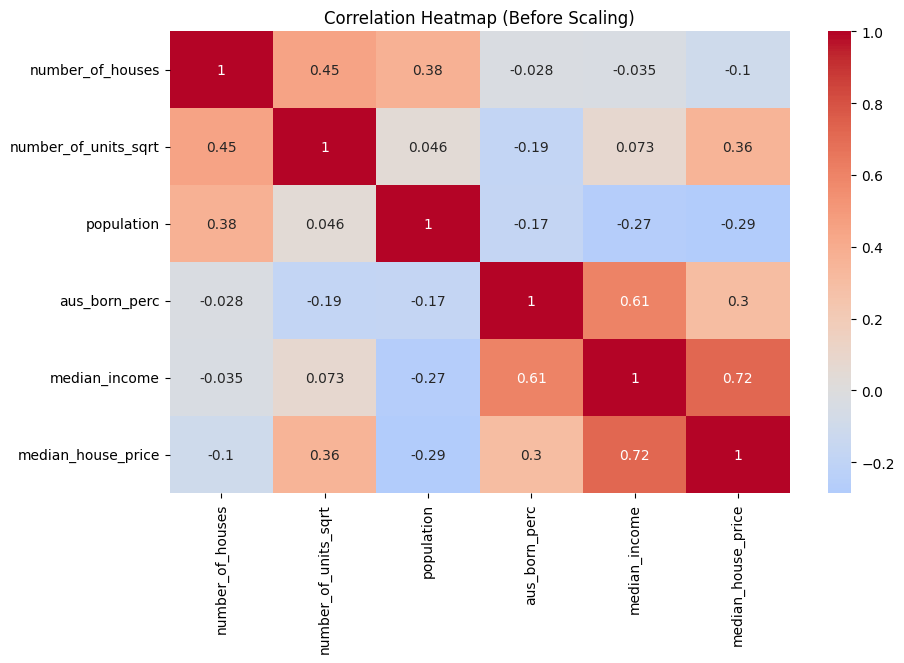

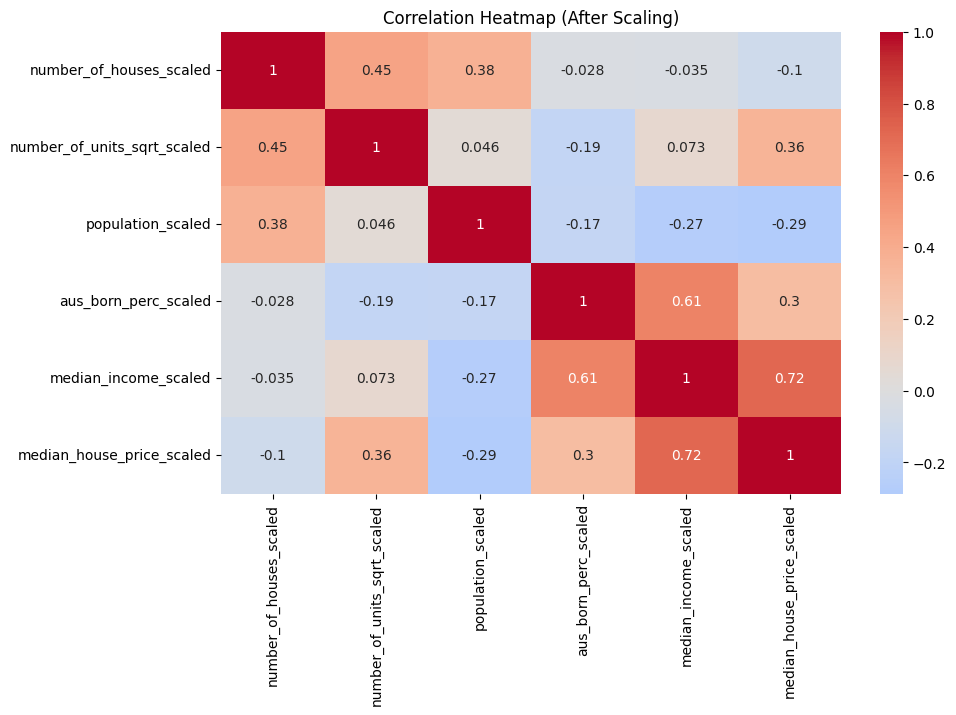

   number_of_houses_scaled  number_of_units_sqrt_scaled  population_scaled  \
0                 0.087660                     0.410083           0.071608   
1                 0.048883                     0.091228           0.413709   
2                 0.070007                     0.026964           1.000000   
3                 0.047972                     0.199222           0.566676   
4                 0.062720                     0.171200           0.168236   

   aus_born_perc_scaled  median_income_scaled  median_house_price_scaled  
0              0.615385              0.677138                   0.334459  
1              0.865385              0.545666                   0.599257  
2              0.192308              0.159395                   0.036731  
3              0.307692              0.172193                   0.097906  
4              0.711538              0.526469                   0.516085  


In [19]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to scale
features_to_scale = ['number_of_houses', 'number_of_units_sqrt', 'population', 'aus_born_perc', 'median_income', 'median_house_price']

# Create a new DataFrame with only the features we want to scale
df_to_scale = suburb_info[features_to_scale]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform
scaled_data = scaler.fit_transform(df_to_scale)

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=[f"{col}_scaled" for col in features_to_scale], index=suburb_info.index)

# Add the scaled data back to the original DataFrame
suburb_info_scaled = pd.concat([suburb_info, df_scaled], axis=1)

# Correlation heatmap before scaling
plt.figure(figsize=(10, 6))
sns.heatmap(df_to_scale.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Before Scaling)")
plt.show()

# Correlation heatmap after scaling
plt.figure(figsize=(10, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (After Scaling)")
plt.show()

# Display the first few rows of the scaled DataFrame to verify
print(suburb_info_scaled[df_scaled.columns].head())


Interpretation of Results:

- The heatmaps before and after scaling show that feature relationships (i.e., correlations) remain consistent, as scaling does not affect correlation values.
- Median income shows a strong correlation with median house price (0.72) before and after scaling.
- Other features like the number of houses or population exhibit weaker correlations with house price, indicating that they may not be strong predictors for the target variable (median house price).

**Linear Regression**

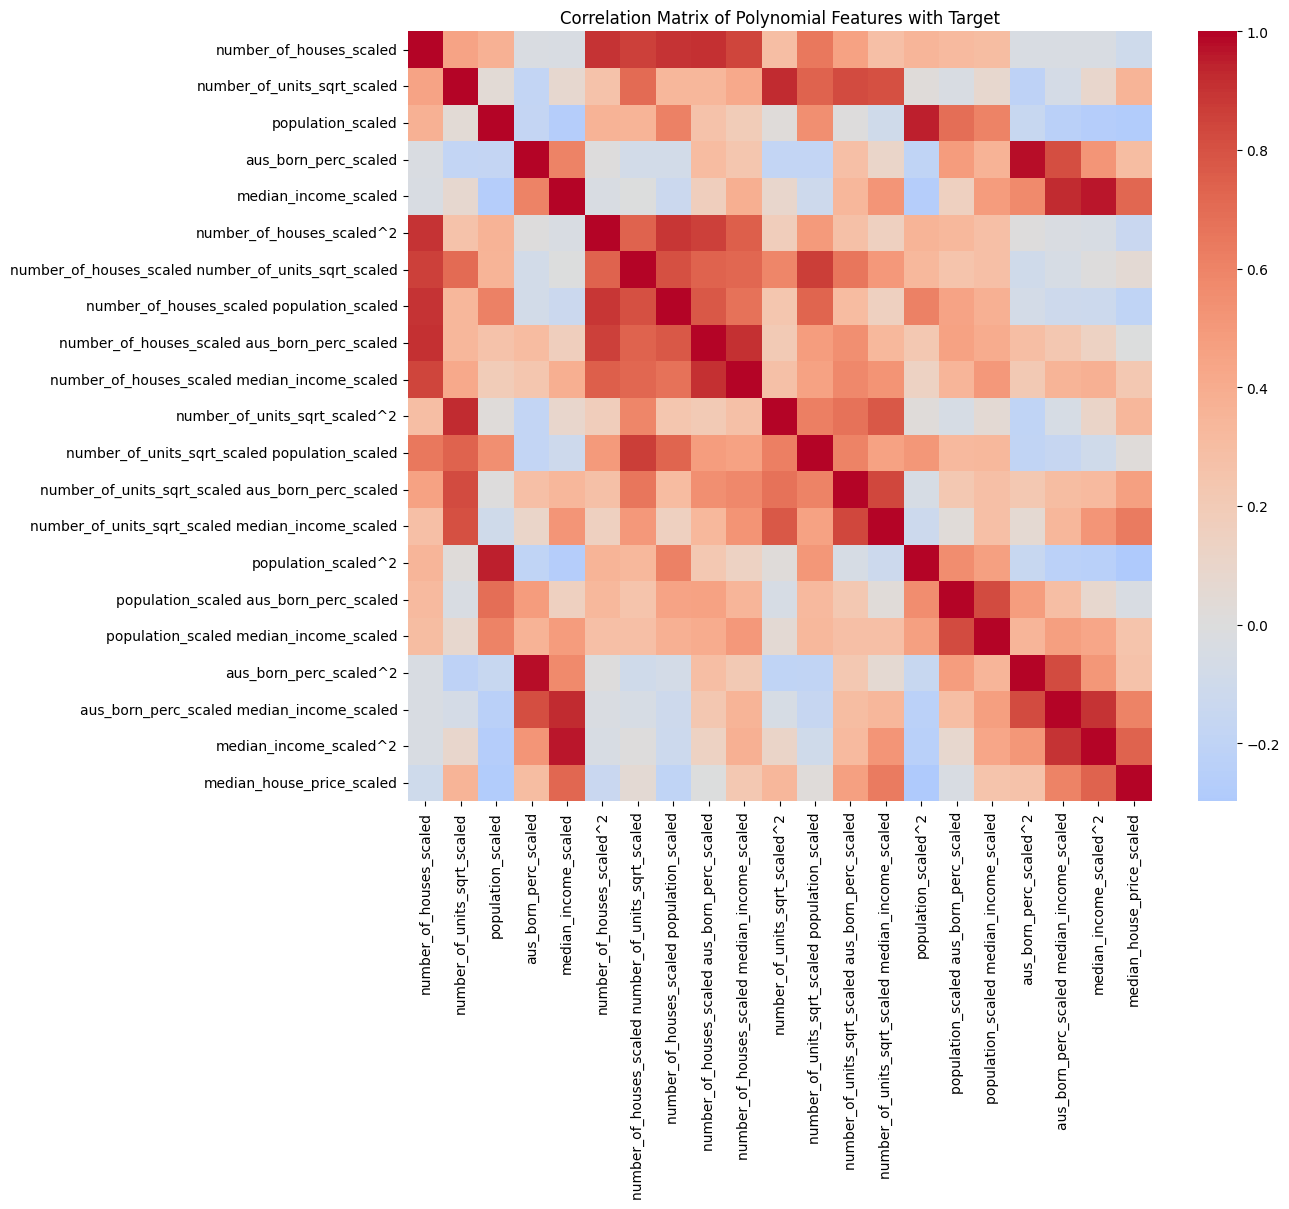

R-squared using polynomial features: 0.7345

number_of_houses_scaled: -0.2553
number_of_units_sqrt_scaled: 0.9695
population_scaled: 0.4853
aus_born_perc_scaled: 0.4568
median_income_scaled: 0.1241
number_of_houses_scaled^2: 0.5927
number_of_houses_scaled number_of_units_sqrt_scaled: -0.1022
number_of_houses_scaled population_scaled: 0.2581
number_of_houses_scaled aus_born_perc_scaled: -1.5350
number_of_houses_scaled median_income_scaled: 0.9579
number_of_units_sqrt_scaled^2: -0.4635
number_of_units_sqrt_scaled population_scaled: -0.8253
number_of_units_sqrt_scaled aus_born_perc_scaled: 0.4238
number_of_units_sqrt_scaled median_income_scaled: -0.1193
population_scaled^2: -0.2965
population_scaled aus_born_perc_scaled: 0.0461
population_scaled median_income_scaled: -0.4426
aus_born_perc_scaled^2: -0.1841
aus_born_perc_scaled median_income_scaled: -0.2300
median_income_scaled^2: 0.7984

Intercept: -0.2221

Feature Importance:
                                              feature  importa

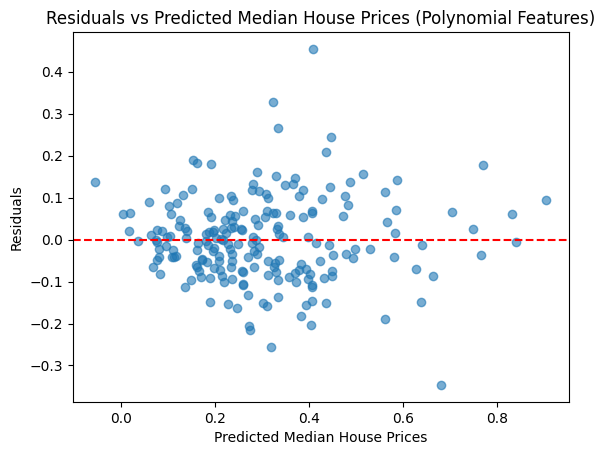

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select the scaled features (excluding the target 'median_house_price_scaled')
X = df_scaled.drop(columns=['median_house_price_scaled'])

# Target variable
y = df_scaled['median_house_price_scaled']

# Create polynomial features (degree=2 includes interaction terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Retrieve the feature names generated by PolynomialFeatures
feature_names = poly.get_feature_names_out(X.columns)

# Create a DataFrame of the polynomial features
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Add the target variable to the DataFrame to compute correlation
X_poly_df['median_house_price_scaled'] = y

# Plot a correlation matrix to see how polynomial features correlate with the target
plt.figure(figsize=(12, 10))
correlation_matrix = X_poly_df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Polynomial Features with Target")
plt.show()

# Initialize a linear regression model
model = LinearRegression()

# Fit the model with the polynomial features
model.fit(X_poly, y)

# Predict using the model
y_pred = model.predict(X_poly)

# Calculate R-squared to evaluate the model
r2 = r2_score(y, y_pred)

# Print the R-squared value
print(f"R-squared using polynomial features: {r2:.4f}\n")

# Retrieve the feature names generated by PolynomialFeatures
feature_names = poly.get_feature_names_out(X.columns)

# Print feature coefficients
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")

# Calculate and print the feature importance (absolute value of coefficients)
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Plotting Residuals to visualize
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Median House Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Median House Prices (Polynomial Features)')
plt.show()


Interpretation of Results:

- The R-squared value of **0.7404** indicates that the polynomial regression model explains 74% of the variance in median_house_price_scaled, showing that the model captures the relationships between features and house prices well. The use of polynomial features improved the models performance by capturing non-linear relationships that a basic linear regression would miss.

- Key feature coefficients highlight that median_income_scaled has the largest positive impact (0.6143), confirming income as a major driver of house prices. number_of_units_sqrt_scaled (0.5387) and number_of_houses_scaled (0.3854) are also positively correlated with house prices, suggesting that suburbs with more units and houses tend to have higher house prices. Interaction terms such as median_income_scaled^2 (0.1255) show that higher incomes have a compounding effect on house prices.

- The residual plot shows that residuals are fairly evenly distributed around zero, indicating that the model predicts well. However, some residuals are larger, suggesting that there may be complexities or outliers that the model did not fully capture.

- In terms of feature importance, median_income_scaled, number_of_units_sqrt_scaled, and number_of_houses_scaled are the most influential variables. The quadratic and interaction terms further contribute to model flexibility, capturing the non-linear relationships between features and house prices.

Overall, polynomial features were used to model complex relationships, allowing for a more accurate and flexible representation of how these variables influence house prices.

**Linear Assumption Check:**

To evaluate if the transformed and scaled data satisfies the assumptions of linear regression, we have checked the following four assumptions: Linearity, Homoscedasticity, Independence, and Normality.We have done these as shown below:


**Linearity check:**

We can check the linearity assumption by plotting the predicted values against the actual values of the target variable (median_house_price_scaled). The relationship should appear linear.

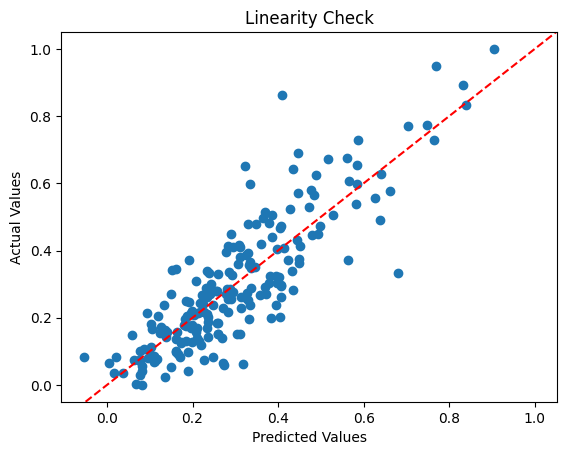

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to check linearity
# y_pred are the predicted values, y is the actual target variable
plt.scatter(y_pred, y)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linearity Check')
plt.axline([0, 0], [1, 1], color='red', linestyle='--')
plt.show()


Interpretation: The points should lie close to the red line if the linearity assumption is met. In the graph above , the scatter plot shows that most points cluster around the red line, indicating that the relationship between the predictors and the target variable is reasonably linear.

**Homoscedasticity check:**

The variance of residuals should remain constant for all values of the independent variables.We can check homoscedasticity by plotting the residuals (errors) against the predicted values as shown below :

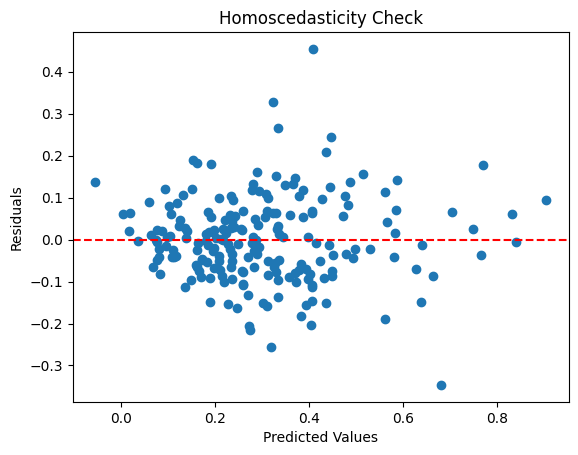

In [22]:
# Residuals
residuals = y - y_pred

# Plot residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Adds a horizontal line at zero
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()


Interpretation: The residuals should be randomly scattered around 0, and the spread should remain consistent across all predicted values. From the above graph we can observ that the residuals are fairly evenly spread, with no clear pattern, meaning the assumption of homoscedasticity is likely satisfied. However, there is slight clustering, which could indicate minor heteroscedasticity.

**Independence:**

We can check for independence of errors by calculating the Durbin-Watson statistic, which tests for autocorrelation in residuals.
A value of the Durbin-Watson statistic close to 2 indicates that the residuals are uncorrelated, which means the independence assumption is met.

In [23]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test for independence
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw_statistic}')


Durbin-Watson Statistic: 1.84995548627956


Interpretation: The Durbin-Watson statistic ranges from 0 to 4, where a value around 2 indicates no autocorrelation.We can see that the value is close to 2 (1.85), suggesting that the residuals are independent, and the independence assumption is likely met.

**Normality check:**

The residuals should follow a normal distribution. we can check this by plotting a Q-Q plot (quantile-quantile plot) and also by visualizing the distribution of residuals.

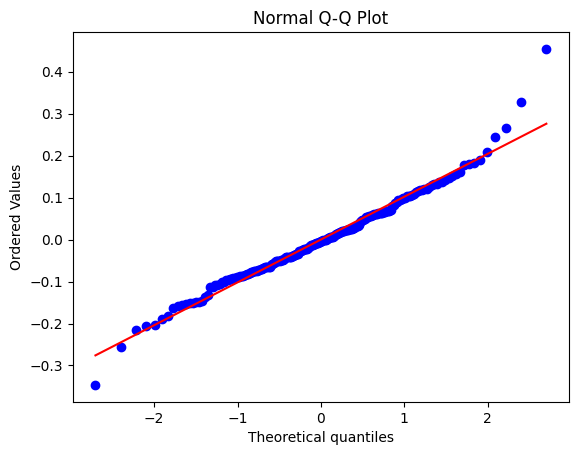

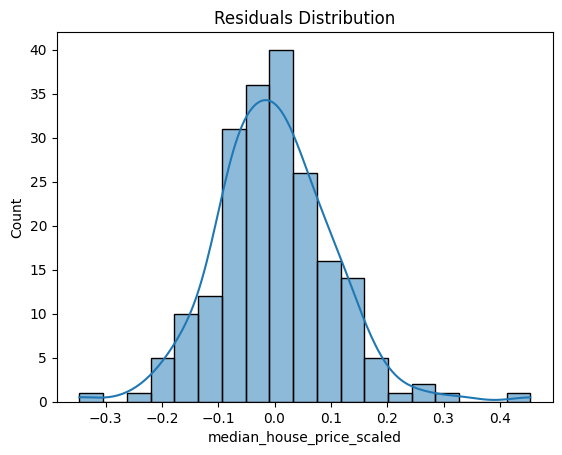

In [24]:
import scipy.stats as stats

# Q-Q plot for normality check
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

# Histogram to check normality of residuals
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()


Interpretation:

- In the Q-Q plot, the points fall mostly along the red line, indicating that the residuals follow a normal distribution, except for a few deviations at the extremes (outliers).

- The histogram shows that the residuals are approximately normally distributed with a slight skew around zero, which is a good sign for normality. The presence of a bell-shaped curve supports the normality assumption.

**Reference**

- Assumption of linear regression:
https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html#:~:text=Linearity%3A%20The%20relationship%20between%20X,X%2C%20Y%20is%20normally%20distributed.



- Independence test using Durbin-Watson statistic:
https://link.springer.com/referenceworkentry/10.1007/978-0-387-32833-1_122#:~:text=The%20Durbin%E2%80%93Watson%20test%20introduces,residuals%20obtained%20in%20this%20way.



- why adding polynomianl features to the model is important:
https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/#:~:text=Linear%20regression%20is%20linear%20in,model%20to%20identify%20nonlinear%20patterns.


- Referred pre class material of week 8 :  Data Reshaping
Zahraa Abdallah
